In [234]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Read txt file

In [235]:
# Change the current working folder to the project folder
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic/Java/docs')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs


In [236]:
df = pd.read_csv("../output/FFTVar.txt", sep='\t')
df.head()

RealType NoiseType  Noise  Signal  Order  Freq       Test  Uncertainty Mean  \
0      Var  Gaussian    0.0  Linear      4     0    Forward      4.027000e-15   
1      Var  Gaussian    0.0  Linear      4     0    Reverse      6.795000e-16   
2      Var  Gaussian    0.0  Linear      4     0  Roundtrip      1.249000e-15   
3      Var     White    0.0  Linear      4     0    Forward      4.027000e-15   
4      Var     White    0.0  Linear      4     0    Reverse      6.795000e-16   

   Uncertainty Deviation  Uncertainty Minimum  ...     1.2  1.4     1.6  1.8  \
0           2.439000e-15         0.000000e+00  ...  0.0690  0.0  0.0345  0.0   
1           1.581000e-16         4.318000e-16  ...  0.0000  0.0  0.0000  0.0   
2           2.457000e-16         9.823000e-16  ...  0.0625  0.0  0.0000  0.0   
3           2.439000e-15         0.000000e+00  ...  0.0690  0.0  0.0345  0.0   
4           1.581000e-16         4.318000e-16  ...  0.0000  0.0  0.0000  0.0   

   2.0     2.2    2.4  2.6  2.8  3.0  
0  0.0  0.0345  0.000  0.0  0.0  0.0  
1  0.0  0.0000  0.143  0.0  0.0  0.0  
2  0.0  0.0000  0.000  0.0  0.0  0.0  
3  0.0  0.0345  0.000  0.0  0.0  0.0  
4  0.0  0.0000  0.143  0.0  0.0  0.0  

[5 rows x 46 columns]

In [237]:
df.dtypes

RealType                  object
NoiseType                 object
Noise                    float64
Signal                    object
Order                      int64
Freq                       int64
Test                      object
Uncertainty Mean         float64
Uncertainty Deviation    float64
Uncertainty Minimum      float64
Uncertainty Maximum      float64
Error Mean               float64
Error Deviation          float64
Error Minimum            float64
Error Maximum            float64
-3.0                     float64
-2.8                     float64
-2.6                     float64
-2.4                     float64
-2.2                     float64
-2.0                     float64
-1.8                     float64
-1.6                     float64
-1.4                     float64
-1.2                     float64
-1.0                     float64
-0.8                     float64
-0.6                     float64
-0.4                     float64
-0.2                     float64
0.0       

# Overall

In [238]:
def PlotSurface(test, value, noiseType, signal, freq=0):
    logz = (value == 'Uncertainty Mean')
    dfOrderVsNoise = df[(df['Noise']!=0) & (df['NoiseType']==noiseType) & 
                                (df['Signal']==signal) & (df['Test']==test) & (df['Freq']==freq)]\
                .pivot(index='Noise', columns='Order', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values if logz else dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=plt.cm.spring if logz else plt.cm.winter )
    fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    ax.set_title(f'{signalName} {test} {value}')
    
    ax.set_xlabel('Order')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 2)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

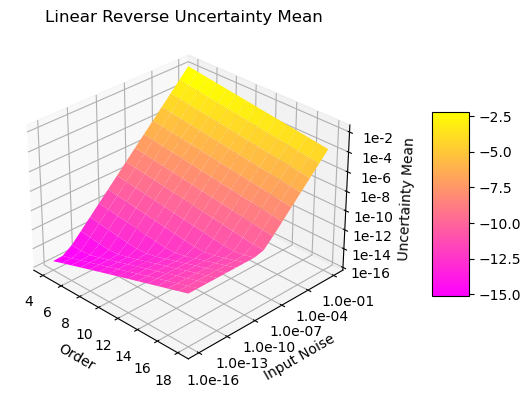

In [239]:
PlotSurface('Reverse', 'Uncertainty Mean', 'Gaussian', 'Linear')

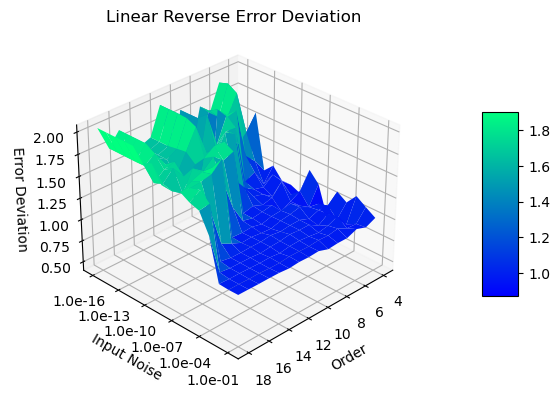

In [240]:
PlotSurface('Reverse', 'Error Deviation', 'Gaussian', 'Linear')

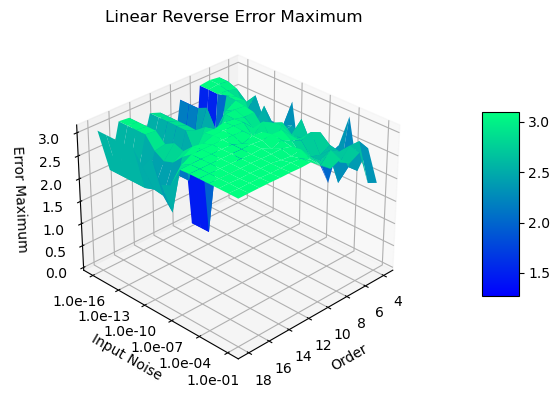

In [241]:
PlotSurface('Reverse', 'Error Maximum', 'Gaussian', 'Linear')

## Sin/Cos

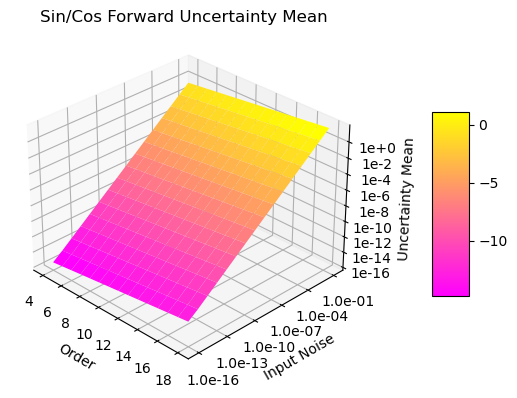

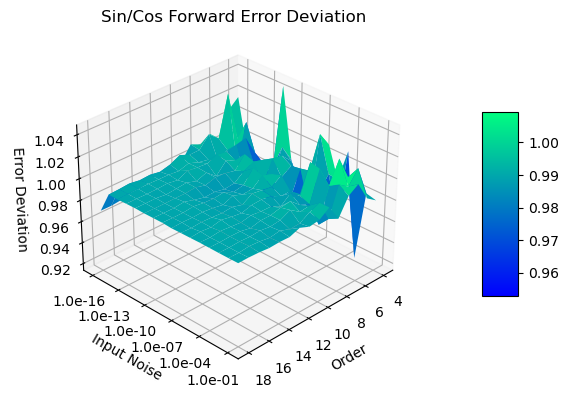

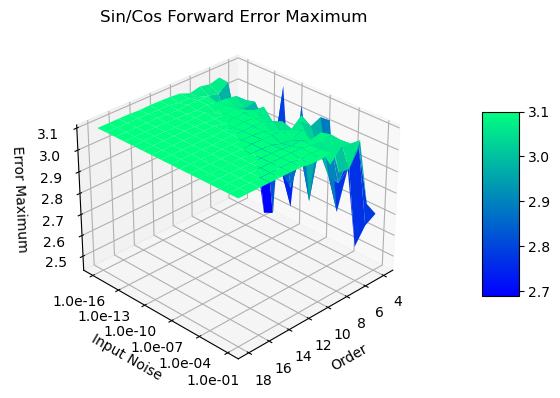

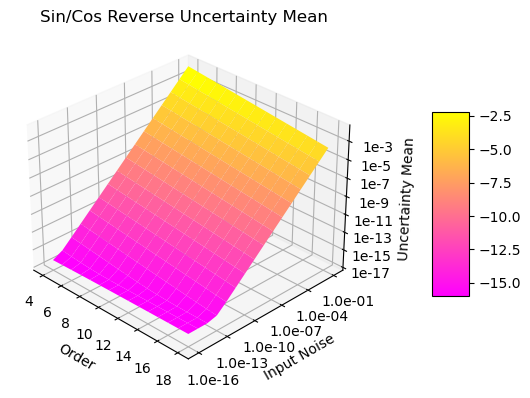

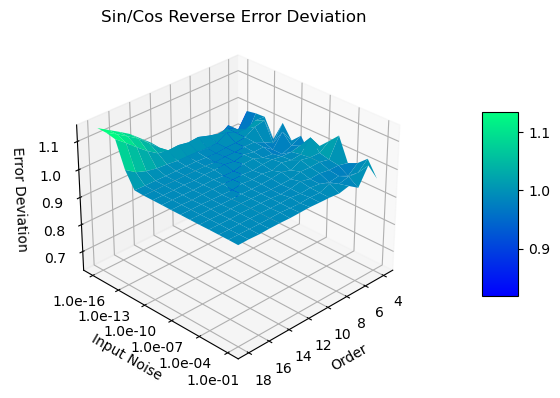

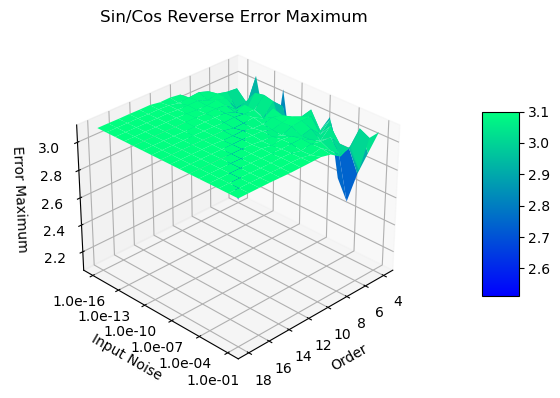

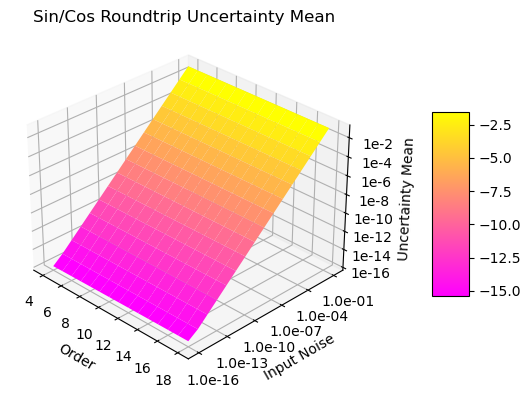

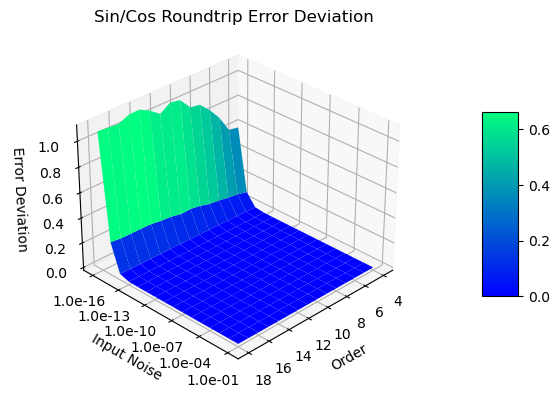

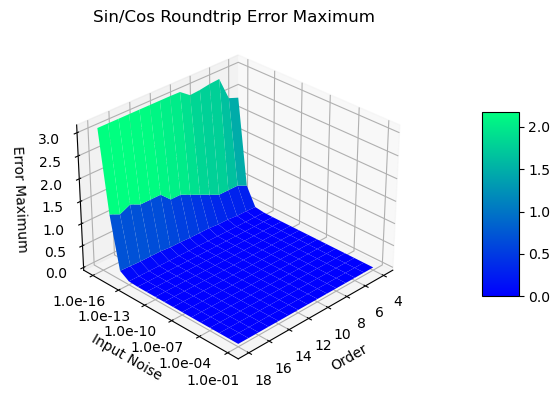

In [242]:
for test in ['Forward', 'Reverse', 'Roundtrip']:
    for value in ['Uncertainty Mean', 'Error Deviation', 'Error Maximum']:
        PlotSurface(test, value, 'Gaussian', 'Aggr')

## Linear

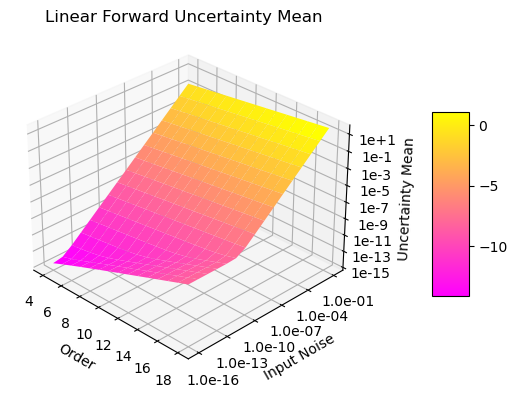

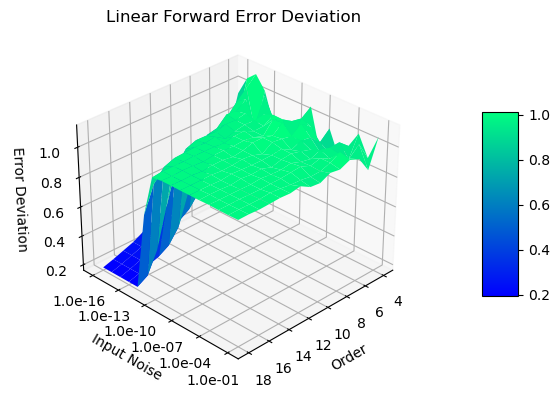

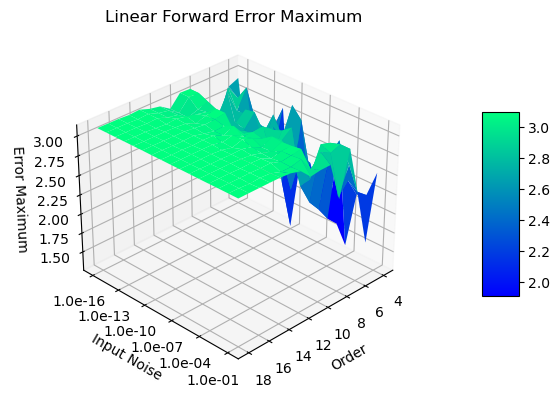

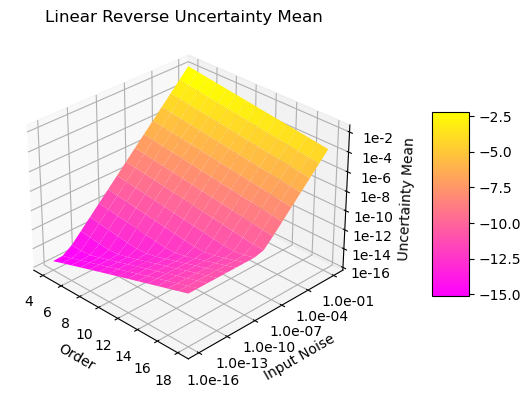

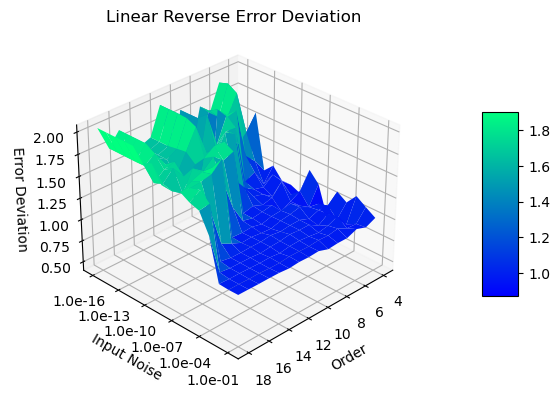

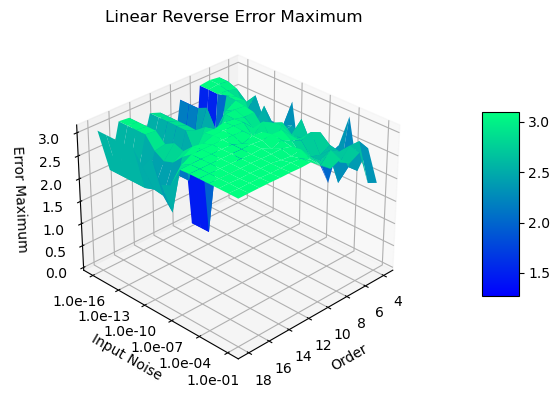

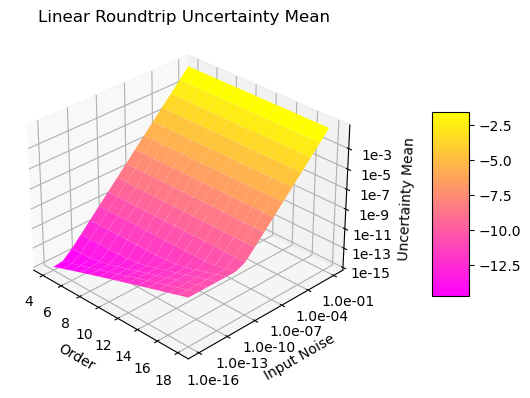

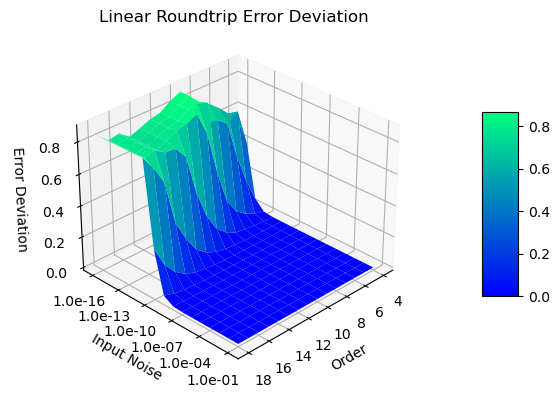

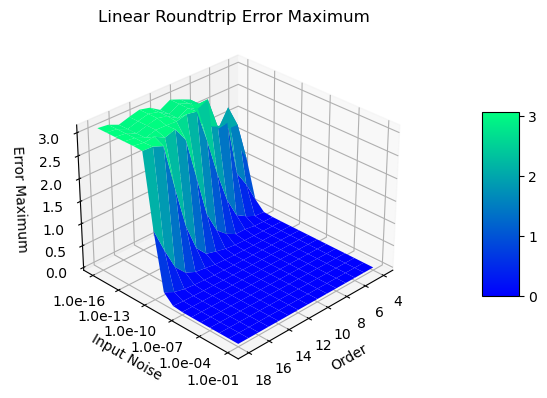

In [243]:
for test in ['Forward', 'Reverse', 'Roundtrip']:
    for value in ['Uncertainty Mean', 'Error Deviation', 'Error Maximum']:
        PlotSurface(test, value, 'Gaussian', 'Linear')

# Export to Excel

This section is obselete

## Plot Order vs Noise

In [244]:
def ExportHistogram(signal, test, noiseType, freq=0):
    with open(f'../Output/FFT_Noise_vs_Order_{signal}{freq}_{test}_{noiseType}.txt', 'w', newline='\n') as f:
        for value in ['UncertaintyMean', 'ErrorDev', 'ErrorMax']:
            signalName = 'Sin/Cos' if signal == 'Aggr' else signal
            if freq == 0:
                f.write(f'{signalName}\t{test}\t{noiseType}\t{value}\n')
            else:
                f.write(f'{signalName}\t{freq}\t{test}\t{noiseType}\t{value}\n')
            dfOrderVsNoise = df[(df['Noise']!=0) & (df['NoiseType']==noiseType) & 
                                (df['Signal']==signal) & (df['Test']==test) & (df['Freq']==freq)]\
                [['Noise', 'Order', value]].set_index('Noise')\
                .pivot(columns='Order', values=value)
            dfOrderVsNoise.to_csv(f, sep='\t')
            f.write('\n')
    return dfOrderVsNoise

In [245]:
# ExportHistogram('Aggr', 'Reverse', 'Gaussian').head()

In [246]:
# ExportHistogram('Linear', 'Reverse', 'Gaussian').head()

In [247]:
# ExportHistogram('Aggr', 'Roundtrip', 'Gaussian').head()

In [248]:
# ExportHistogram('Linear', 'Roundtrip', 'Gaussian').head()

## vs Order

In [249]:
def ExportVsOrder(noise, signal, freq=0):
    dfOrder = df[(df['Signal']==signal) & (df['Noise']==noise)].sort_values(by=['Test', 'NoiseType', 'Order'])
    dfOrder.to_csv(f'../Output/FFT_Order_{signal}{freq}_{noise:.0e}.txt', sep='\t')
    return dfOrder

In [250]:
# ExportVsOrder(0, 'Aggr').head()

In [251]:
# ExportVsOrder(1e-16, 'Aggr').head()

In [252]:
# ExportVsOrder(0, 'Linear').head()

In [253]:
# ExportVsOrder(1e-5, 'Linear').head()

## vs Noise

In [254]:
def ExportVsNoise(order, signal, freq=0):
    dfNoise = df[(df['Signal']==signal) & (df['Order']==order)].sort_values(by=['Test', 'NoiseType', 'Noise'])
    dfNoise.to_csv(f'../Output/FFT_Noise_{signal}{freq}_{order}.txt', sep='\t')
    return dfNoise

In [255]:
# ExportVsNoise(18, 'Aggr')

In [256]:
# ExportVsNoise(18, 'Linear')

# Plot Histogram

In [257]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

-3.0  -2.8  -2.6   -2.4  -2.2  -2.0    -1.8  -1.6  -1.4    -1.2  ...  \
0   0.0   0.0   0.0  0.000   0.0   0.0  0.0345   0.0   0.0  0.0000  ...   
1   0.0   0.0   0.0  0.143   0.0   0.0  0.0000   0.0   0.0  0.0000  ...   
2   0.0   0.0   0.0  0.000   0.0   0.0  0.0000   0.0   0.0  0.0625  ...   
3   0.0   0.0   0.0  0.000   0.0   0.0  0.0345   0.0   0.0  0.0000  ...   
4   0.0   0.0   0.0  0.143   0.0   0.0  0.0000   0.0   0.0  0.0000  ...   

      1.2  1.4     1.6  1.8  2.0     2.2    2.4  2.6  2.8  3.0  
0  0.0690  0.0  0.0345  0.0  0.0  0.0345  0.000  0.0  0.0  0.0  
1  0.0000  0.0  0.0000  0.0  0.0  0.0000  0.143  0.0  0.0  0.0  
2  0.0625  0.0  0.0000  0.0  0.0  0.0000  0.000  0.0  0.0  0.0  
3  0.0690  0.0  0.0345  0.0  0.0  0.0345  0.000  0.0  0.0  0.0  
4  0.0000  0.0  0.0000  0.0  0.0  0.0000  0.143  0.0  0.0  0.0  

[5 rows x 31 columns]

## Sin and Cos

In [258]:
# All Sin and Cos are indentical for noise=0
# All Sin for different freq are indentical for noise=0
# All Sin and Cos for all freq can be aggregated as Aggr signal
# The clean Aggr signals are very similar when the order is larger than 14
# 1e-12 input uncertainty is needed to get rid of the numerical errors in Aggr
# The uniform distribution of the reverse transform

### Sin at different Freq

In [266]:
def PlotManyFreq(order, noise, signal, test, sFreq=[1,2,3,4,5,6]):
    df['algo'] = df['NoiseType'] + ": "+ df['Freq'].astype(str)

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['Signal']==signal) & (df['Test']==test) & 
                 (df['Freq'].isin(sFreq))].set_index('algo')
    dfHisto[sHisto].T.plot( style=['-', '-', '-', '--', '--', '--', '-.', '-.', '-.'], 
                            title=f'{signal} {test} order={order} freq={sFreq} noise={noise}' )

#### Forward

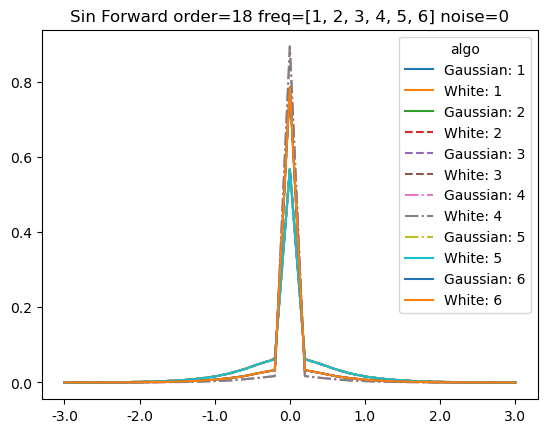

In [267]:
PlotManyFreq(18, 0, 'Sin', 'Forward')

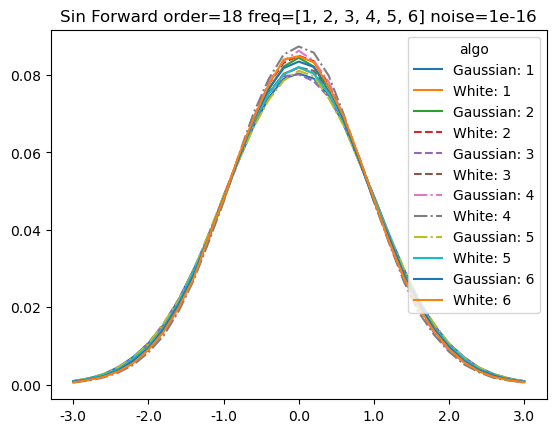

In [268]:
PlotManyFreq(18, 1e-16, 'Sin', 'Forward')

#### Backward

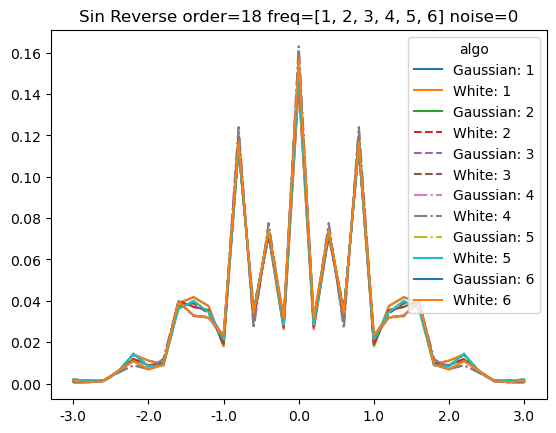

In [270]:
PlotManyFreq(18, 0, 'Sin', 'Reverse')

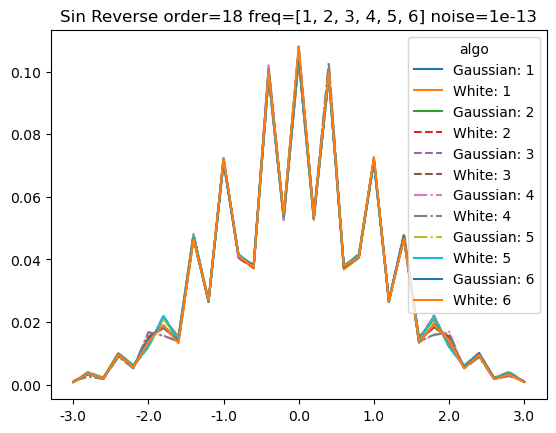

In [271]:
PlotManyFreq(18, 1e-13, 'Sin', 'Reverse')

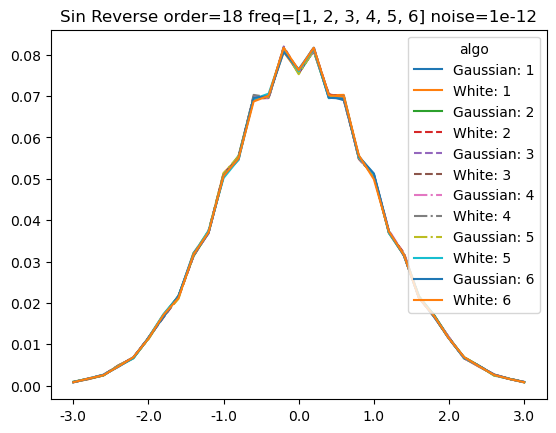

In [272]:
PlotManyFreq(18, 1e-12, 'Sin', 'Reverse')

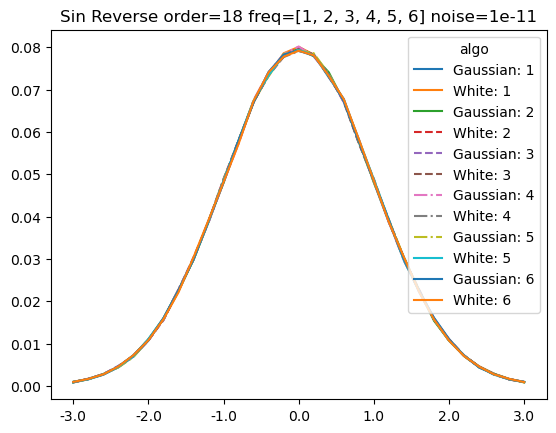

In [273]:
PlotManyFreq(18, 1e-11, 'Sin', 'Reverse')

#### Roundtrip

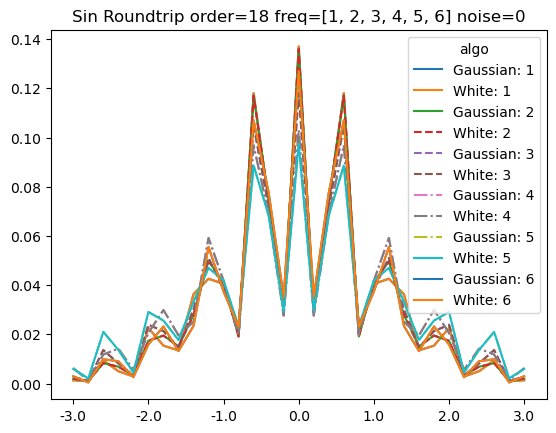

In [274]:
PlotManyFreq(18, 0, 'Sin', 'Roundtrip')

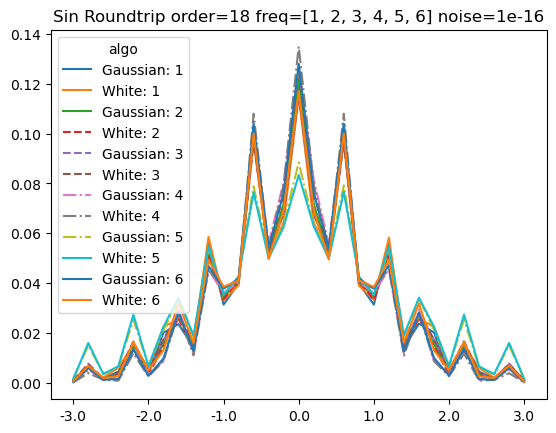

In [275]:
PlotManyFreq(18, 1e-16, 'Sin', 'Roundtrip')

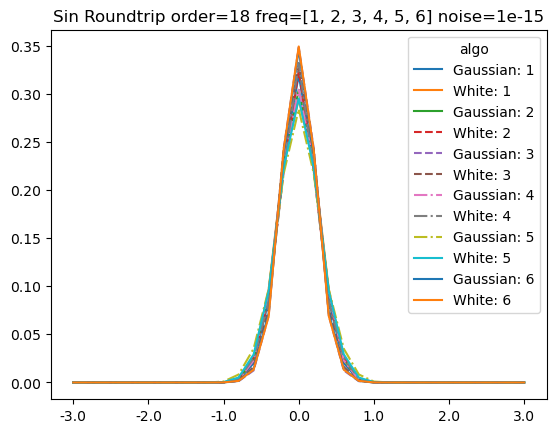

In [276]:
PlotManyFreq(18, 1e-15, 'Sin', 'Roundtrip')

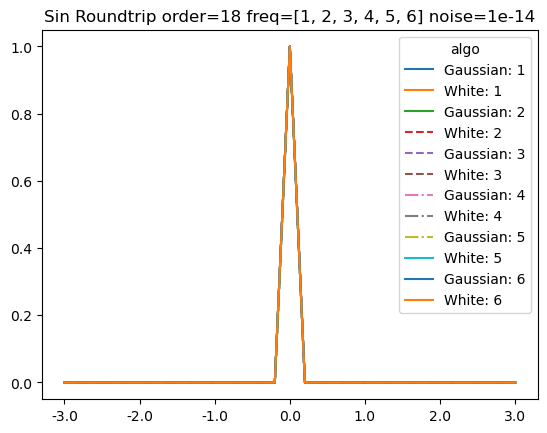

In [277]:
PlotManyFreq(18, 1e-14, 'Sin', 'Roundtrip')

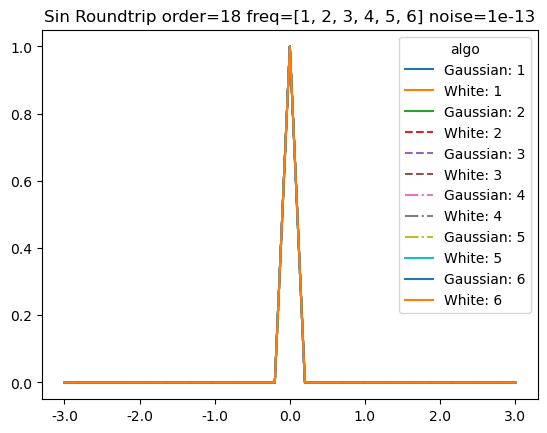

In [278]:
PlotManyFreq(18, 1e-13, 'Sin', 'Roundtrip')

### Sin vs Cos

In [283]:
def PlotSinCos(order, noise, freq, test):
    df['algo'] = df['NoiseType'] + ": "+ df['Signal']

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['Freq']== freq) & (df['Test']==test) & 
             (df['Signal'].isin(['Sin', 'Cos']))].set_index('algo')
    dfHisto[sHisto].T.plot(style=['-', 'x', '--', '+', '--', '--', '-.', '-.', '-.'], logy=True, 
                       title=f'Sin/Cos {test} order={order} freq={freq} noise={noise}')

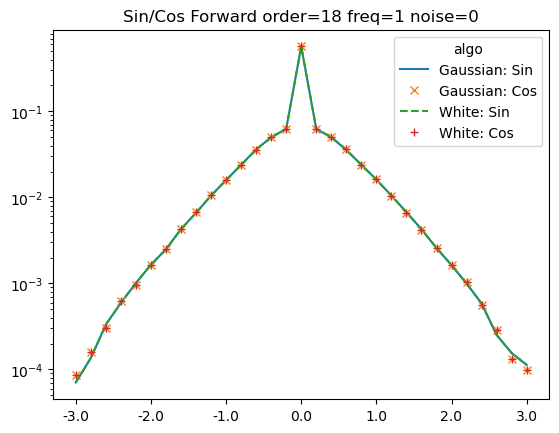

In [284]:
PlotSinCos(18, 0, 1, 'Forward')

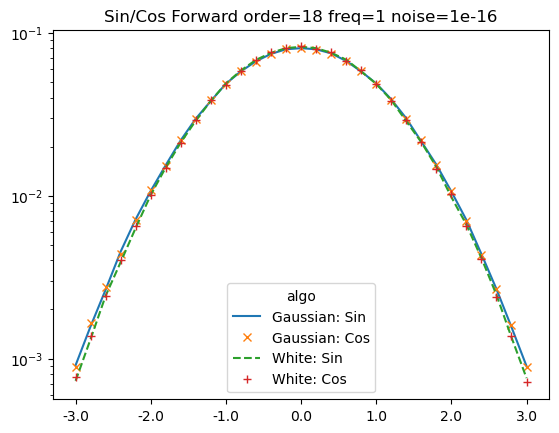

In [285]:
PlotSinCos(18, 1e-16, 1, 'Forward')

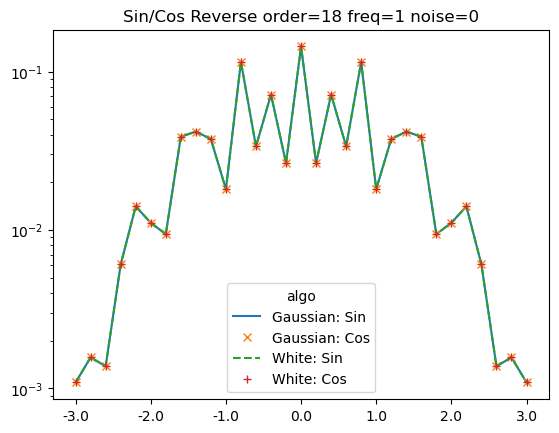

In [287]:
PlotSinCos(18, 0, 1, 'Reverse')

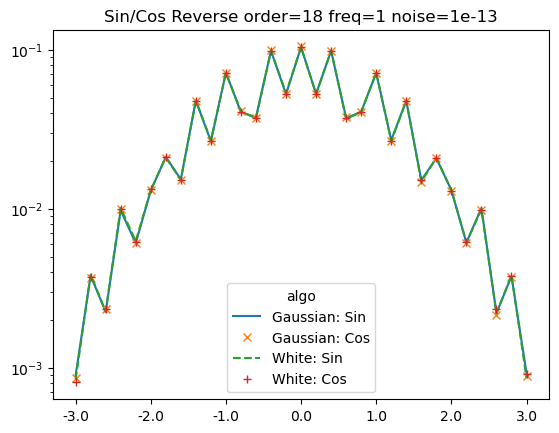

In [288]:
PlotSinCos(18, 1e-13, 1, 'Reverse')

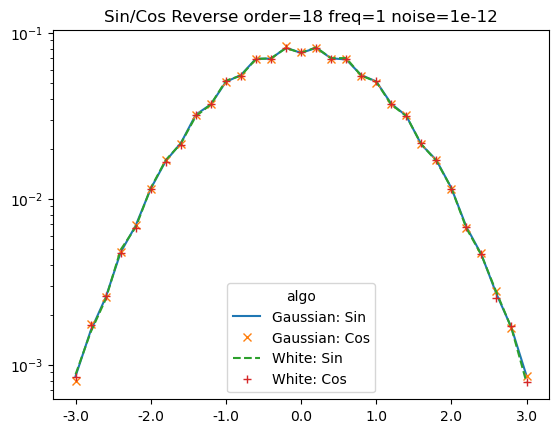

In [289]:
PlotSinCos(18, 1e-12, 1, 'Reverse')

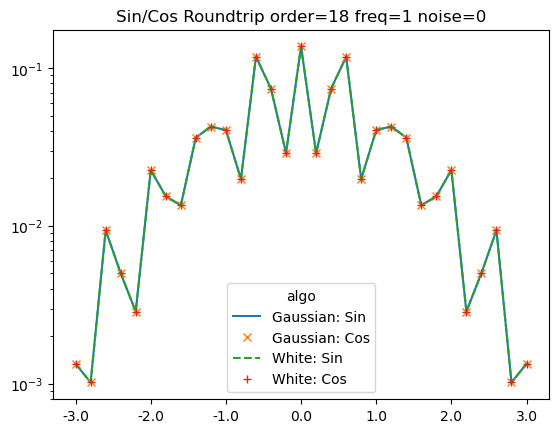

In [290]:
PlotSinCos(18, 0, 1, 'Roundtrip')

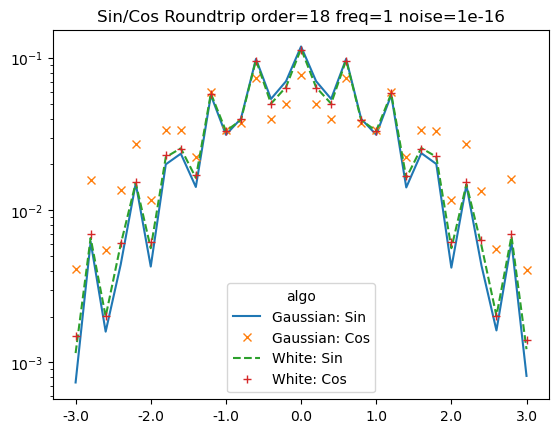

In [291]:
PlotSinCos(18, 1e-16, 1, 'Roundtrip')

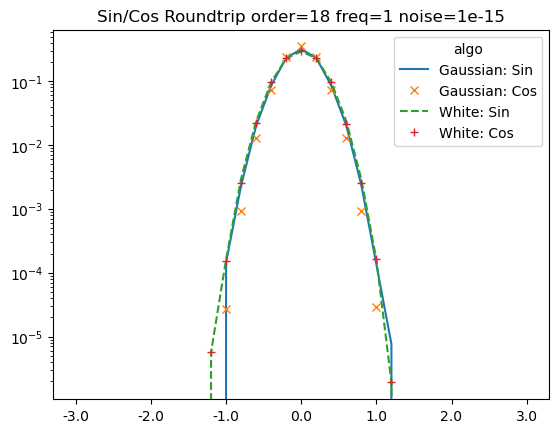

In [292]:
PlotSinCos(18, 1e-15, 1, 'Roundtrip')

### Aggr vs Noise

In [309]:
def PlotHistogram( order, noise, signal, freq=0, ylim=[] ):
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    df['legend'] = df['Test'] + " " + df['NoiseType']

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['Signal']==signal) & (df['Freq']==freq)]\
                .set_index('legend')
    ax = dfHisto[sHisto].T.plot(style=['m-', 'g-', 'b-', 'mx', 'gx', 'bx'],
                           title=f'{signalName} order={order} noise={noise}')
    ax.set_xlabel('Normalized Error')
    ax.set_ylabel('Normalized Histogram Count')
    if ylim:
        ax.set_ylim(ylim)

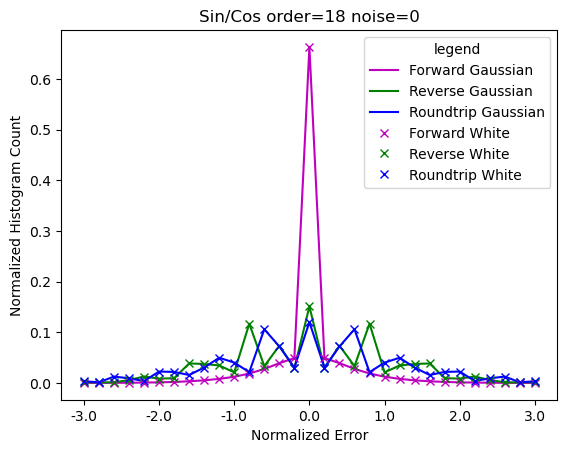

In [310]:
PlotHistogram(18, 0, 'Aggr')

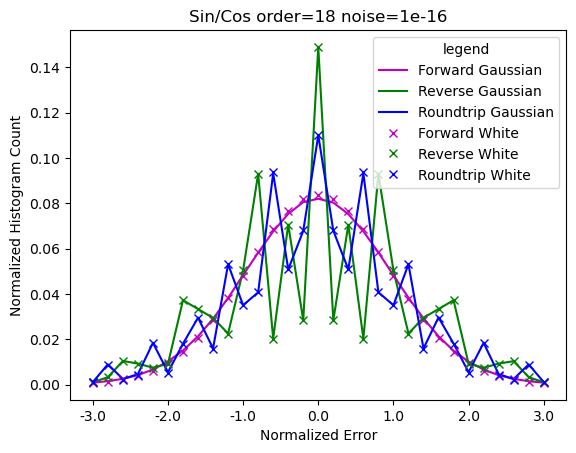

In [311]:
PlotHistogram(18, 1e-16, 'Aggr')

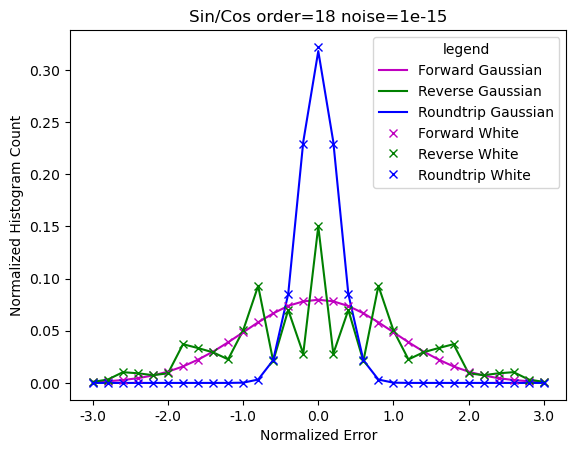

In [312]:
PlotHistogram(18, 1e-15, 'Aggr')

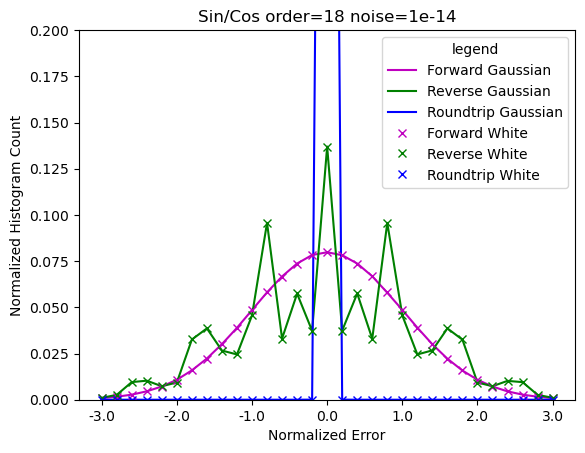

In [313]:
PlotHistogram(18, 1e-14, 'Aggr', ylim=[0, 0.2])

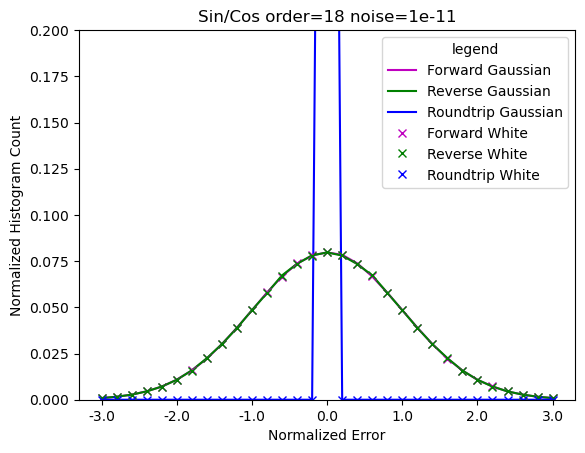

In [314]:
PlotHistogram(18, 1e-11, 'Aggr', ylim=[0, 0.2])

## Slope

In [ ]:
# different noise type are similar, but not iddentical
# 1e-3 input uncertainty is needed to get rid of the numerical errors in Aggr

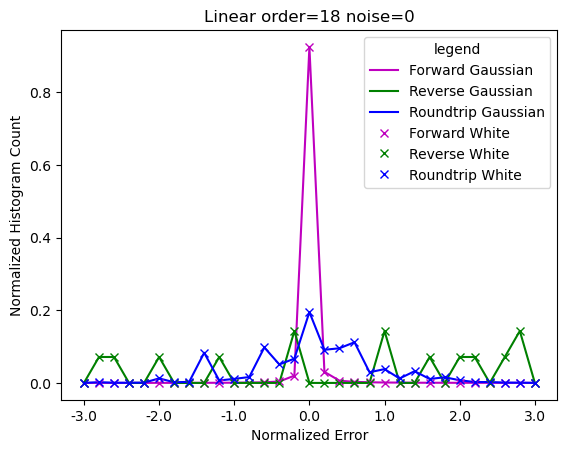

In [315]:
PlotHistogram(18, 0, 'Linear')

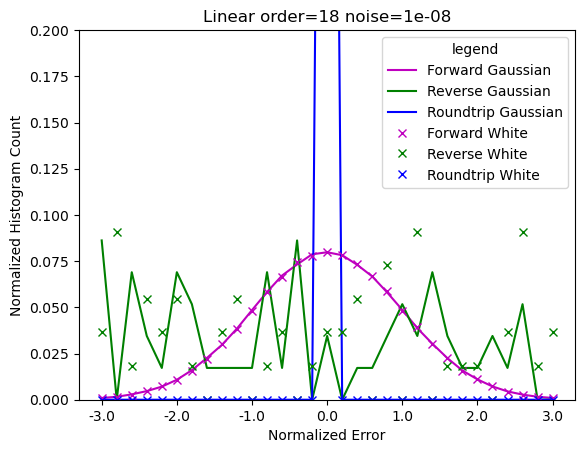

In [318]:
PlotHistogram(18, 1e-8, 'Linear', ylim=[0, 0.2])

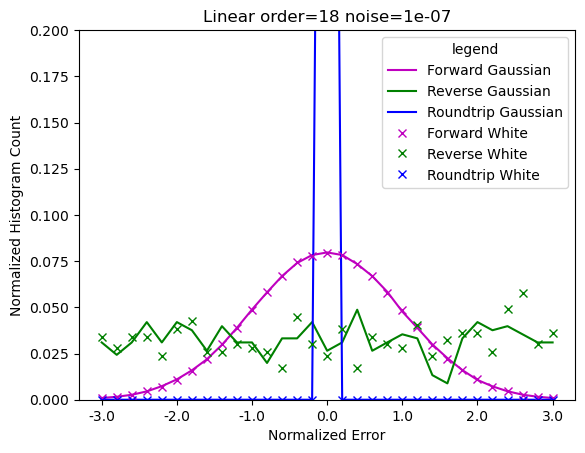

In [319]:
PlotHistogram(18, 1e-7, 'Linear', ylim=[0, 0.2])

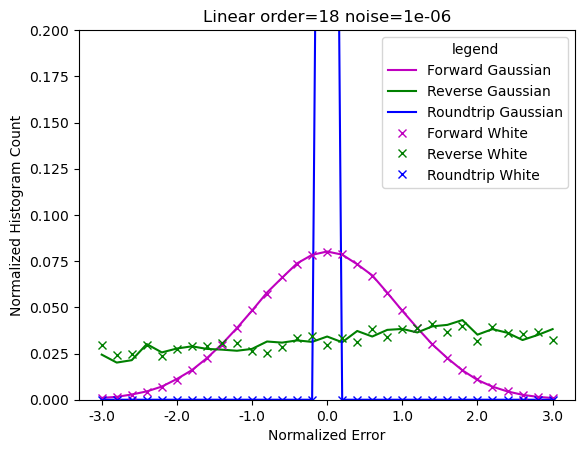

In [320]:
PlotHistogram(18, 1e-6, 'Linear', ylim=[0, 0.2])

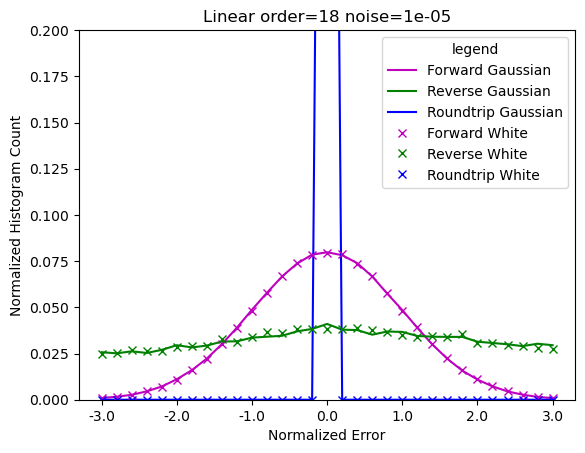

In [321]:
PlotHistogram(18, 1e-5, 'Linear', ylim=[0, 0.2])

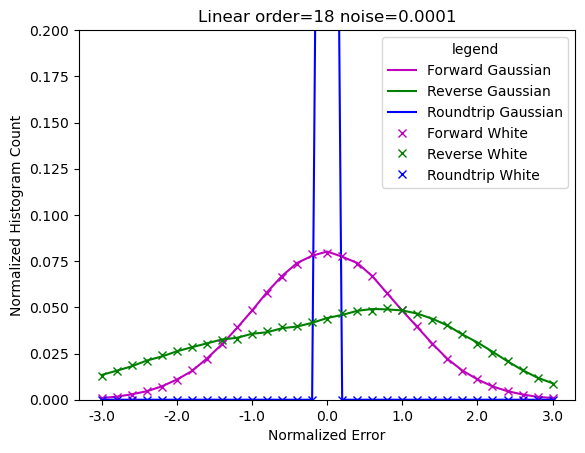

In [322]:
PlotHistogram(18, 1e-4, 'Linear', ylim=[0, 0.2])

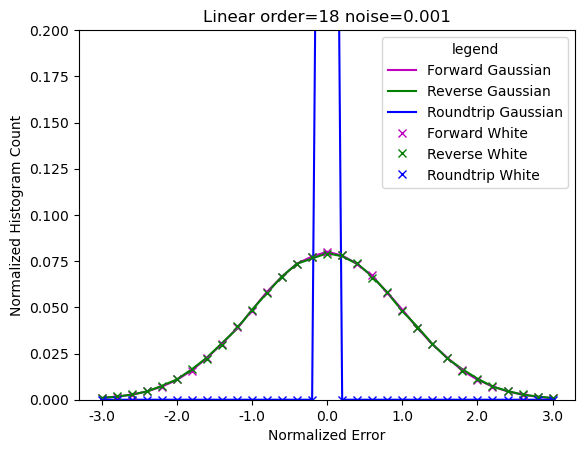

In [323]:
PlotHistogram(18, 1e-3, 'Linear', ylim=[0, 0.2])

# vs Order

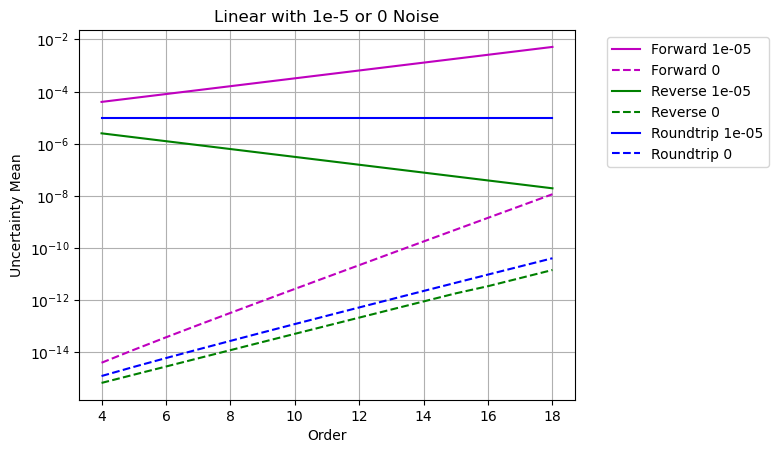

In [374]:
sColor = ['m','g','b','y','c','r']
sStyle = ['-', '--', 'x', '+']
signal = 'Linear'
freq = 0
value = 'Uncertainty Mean'
sNoise = [1e-5, 0]

fig, ax = plt.subplots()
ax.set_title('Linear with 1e-5 or 0 Noise')
ax.set_xlabel('Order')
ax.set_ylabel('Uncertainty Mean')
ax.set_yscale('log')
plt.grid(True)

for test, color in zip(['Forward', 'Reverse', 'Roundtrip'], sColor):
    for noise, style in zip(sNoise, sStyle):
        dfPlot = df[(df['NoiseType']=='Gaussian') & (df['Noise']==noise) & 
                    (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['Order'], dfPlot[value], ''.join([color, style]), label=f'{test} {noise}')
ax.legend(bbox_to_anchor=(1.05, 1.0))


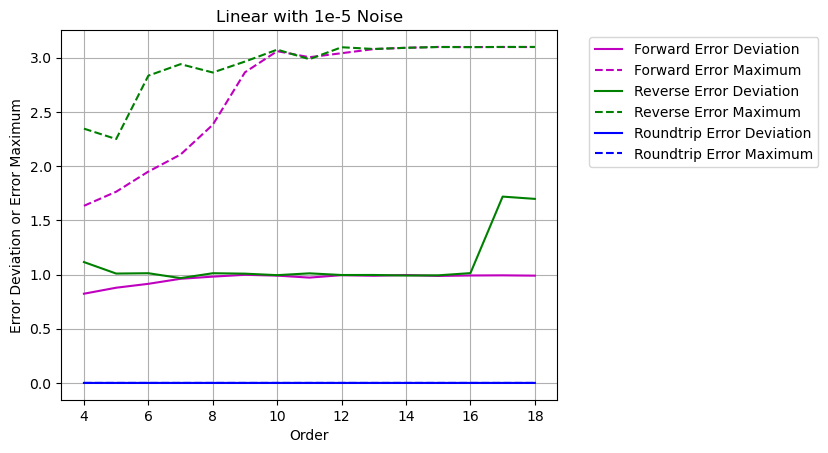

In [376]:
sValue = ['Error Deviation', 'Error Maximum']
noise = 1e-5

fig, ax = plt.subplots()
ax.set_title('Linear with 1e-5 Noise')
ax.set_xlabel('Order')
ax.set_ylabel(' or '.join(sValue))
plt.grid(True)

sColor = ['m','g','b','y','c','r']
sStyle = ['-', '--', 'x', '+']
signal = 'Linear'
freq = 0

for test, color in zip(['Forward', 'Reverse', 'Roundtrip'], sColor):
    for value, style in zip(sValue, sStyle):
        dfPlot = df[(df['NoiseType']=='Gaussian') & (df['Noise']==noise) & 
                    (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['Order'], dfPlot[value], ''.join([color, style]), label=f'{test} {value}')
ax.legend(bbox_to_anchor=(1.05, 1.0))

In [391]:
def PlotClean( sValue, signal, freq=0, logy=False,
                     sStyle=['-', '--', 'x', '+'], sColor = ['m','g','b','y','c','r'] ):
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    
    fig, ax = plt.subplots()
    ax.set_title(f'{signalName} without noise')
    ax.set_xlabel('Order')
    ax.set_ylabel(' or '.join(sValue))
    if logy:
        ax.set_yscale('log')
    plt.grid(True)
    for test, color in zip(['Forward', 'Reverse', 'Roundtrip'], sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']=='Gaussian') & (df['Noise']==0) & 
                        (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['Order'], dfPlot[value], ''.join([color, style]), label=f'{test} {value}')
    ax.legend(bbox_to_anchor=(1.05, 1.0))

    
def PlotUncertainty( signal, freq=0 ):
    PlotClean( sValue = ['Uncertainty Mean', 'Uncertainty Deviation'], signal=signal, freq=freq, logy=True )
    
    
def PlotError( signal, freq=0 ):
    PlotClean( sValue = ['Error Deviation', 'Error Maximum'], signal=signal, freq=freq, logy=False )
    
    

In [262]:
def PlotOrder( value, noise, signal, freq=0, 
               sStyle=['--', 'x', '-', '+'], sColor = ['m','g','b','y','c','r'] ):
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    
    fig, ax = plt.subplots()
    ax.set_title(f'{value} for {signalName} {noise}')
    ax.set_xlabel('Order')
    ax.set_ylabel(value)
    if value == 'Uncertainty Mean':
        ax.set_yscale('log')
    plt.grid(True)
    for test, color in zip(['Forward', 'Reverse', 'Roundtrip'], sColor):
        for noiseType, style in zip(['Gaussian', 'White'], sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise) & 
                        (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['Order'], dfPlot[value], ''.join([color, style]), label=f'{test} {noiseType}')
    ax.legend(bbox_to_anchor=(1.05, 1.0))

In [338]:
def PlotOrderAll( noise, signal, freq=0 ):
    for value in ['Uncertainty Mean', 'Error Deviation', 'Error Maximum']:
        PlotOrder( value, noise, signal, freq )

## Sin and Cos signals

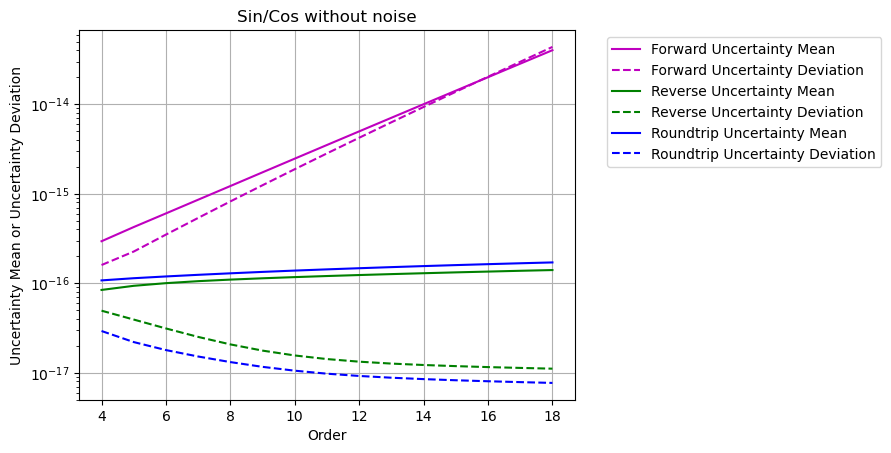

In [347]:
PlotUncertainty('Aggr')

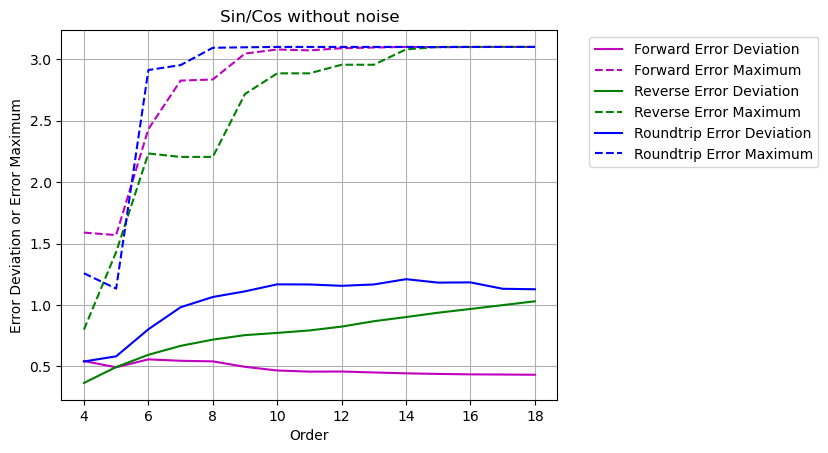

In [351]:
PlotError('Aggr')

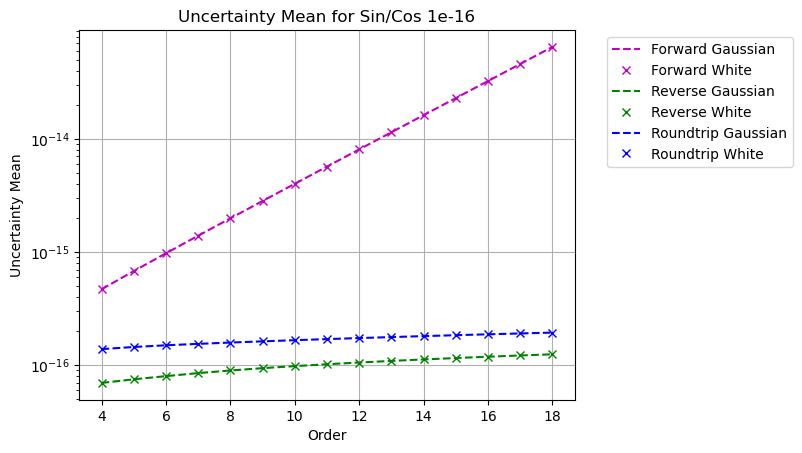

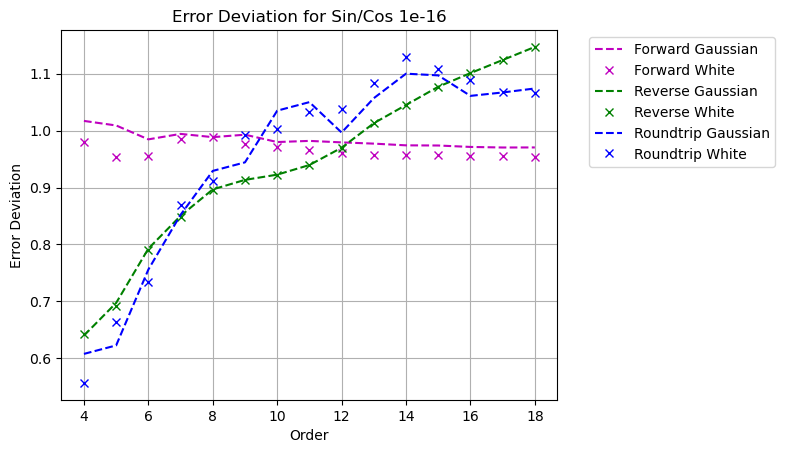

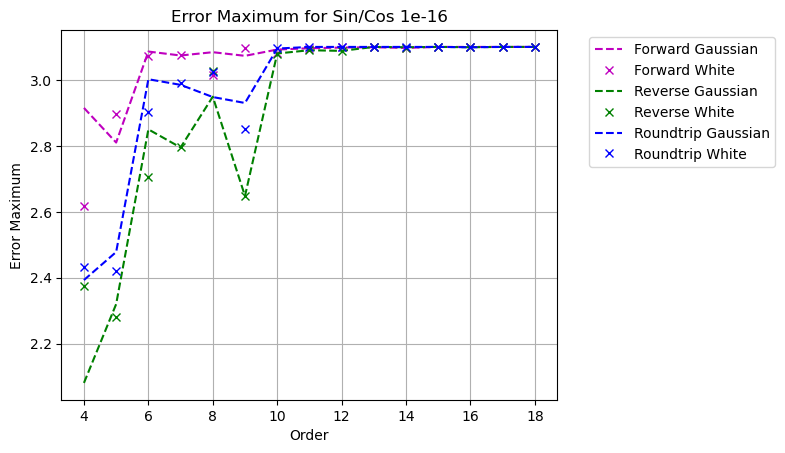

In [339]:
PlotOrderAll(1e-16, 'Aggr')

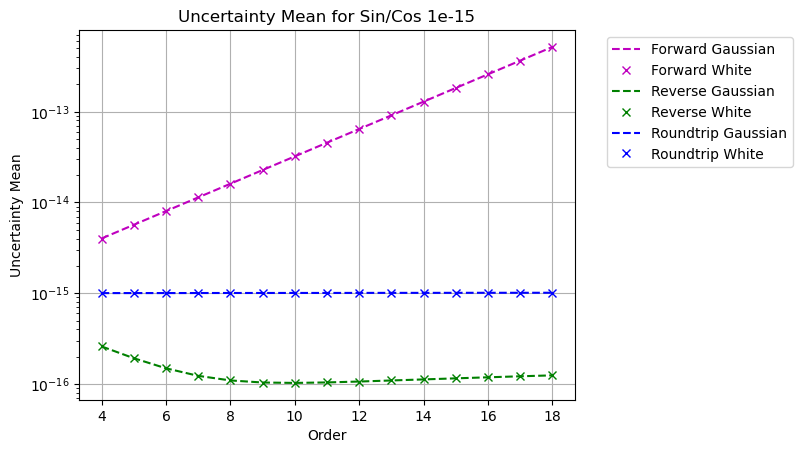

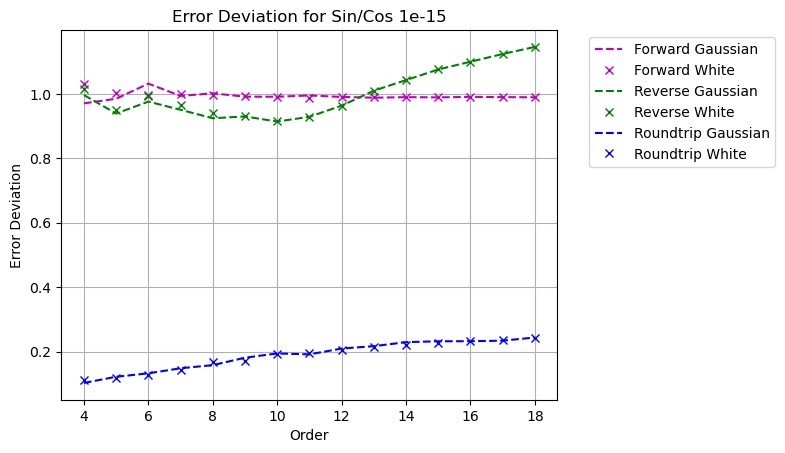

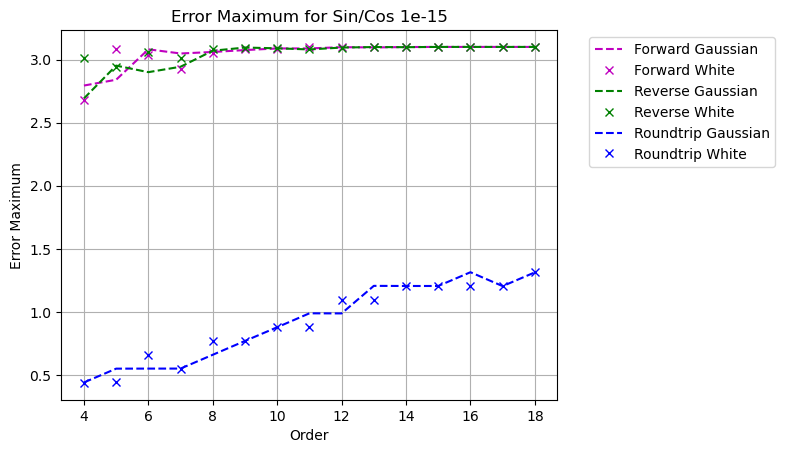

In [340]:
PlotOrderAll(1e-15, 'Aggr')

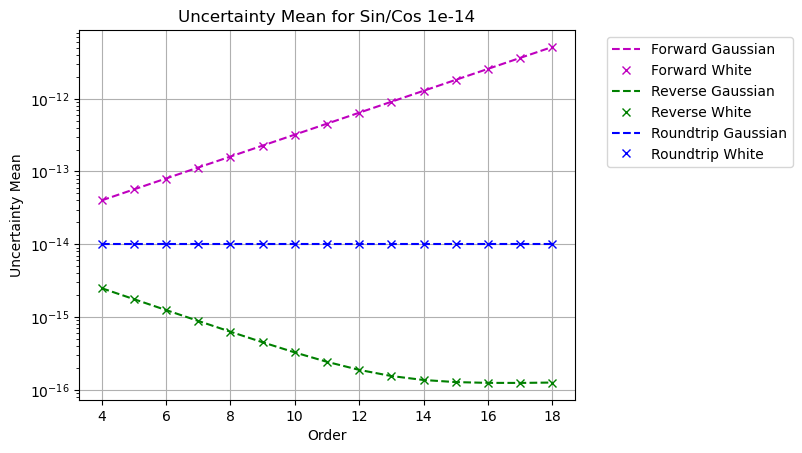

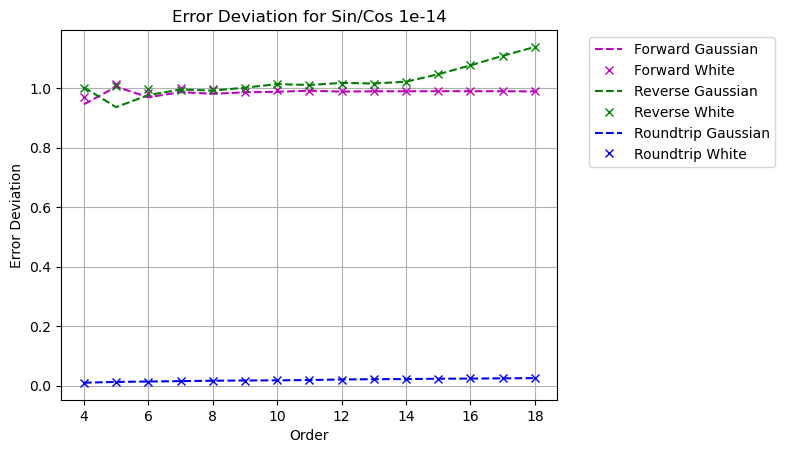

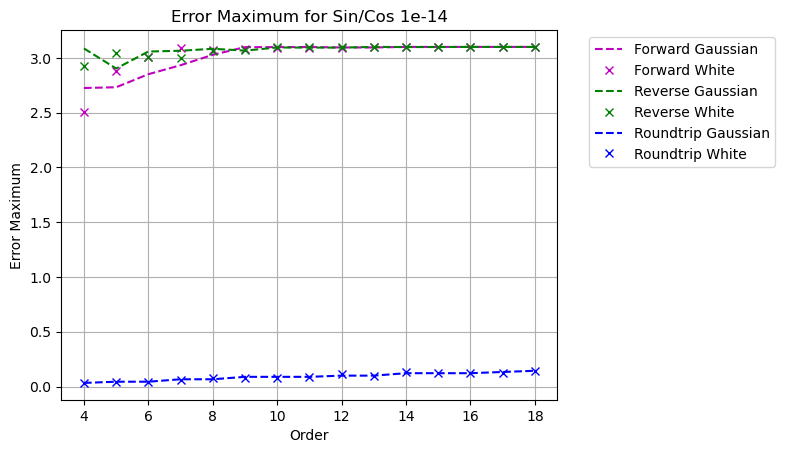

In [341]:
PlotOrderAll(1e-14, 'Aggr')

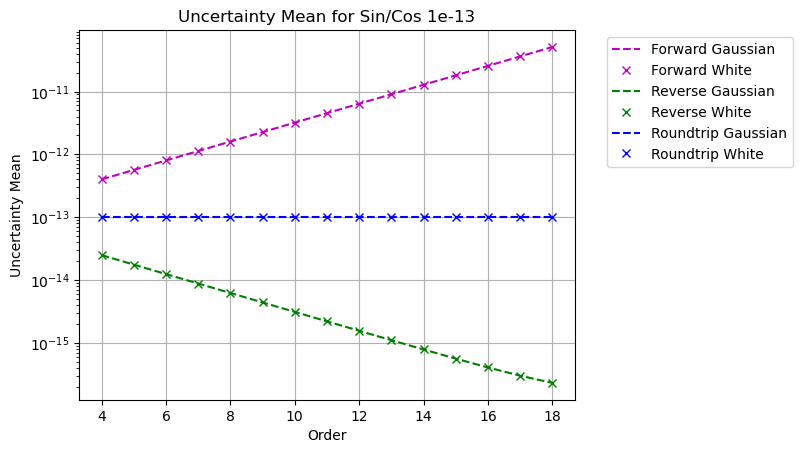

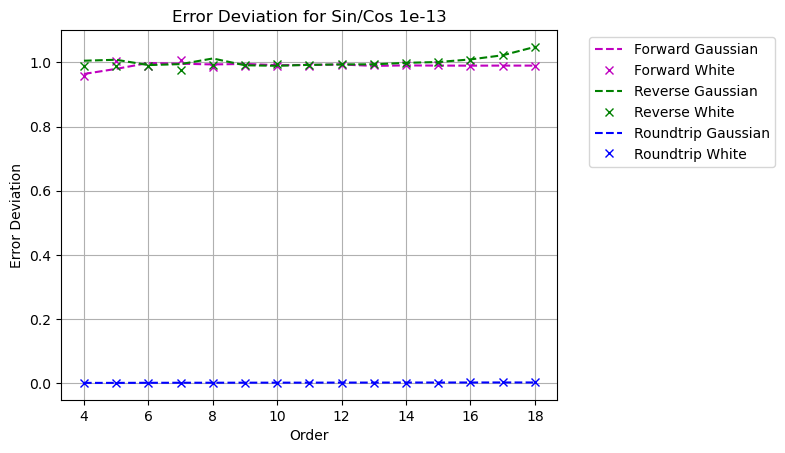

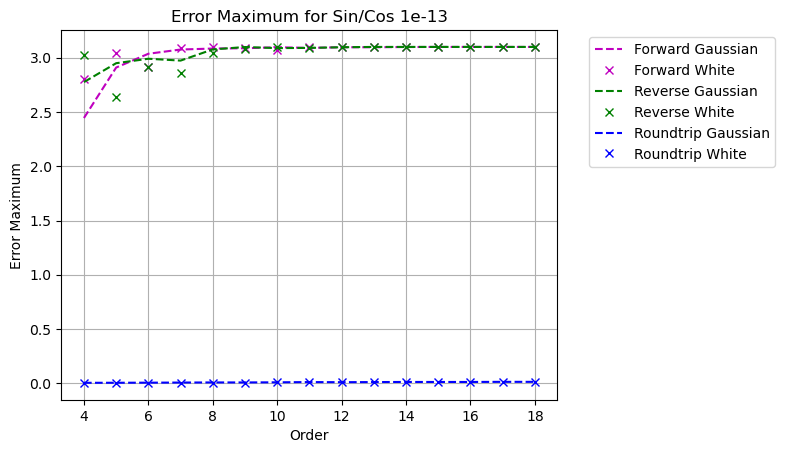

In [342]:
PlotOrderAll(1e-13, 'Aggr')

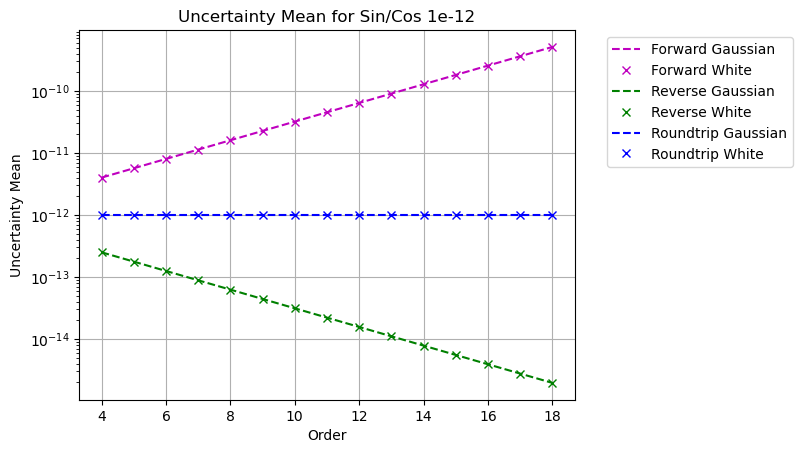

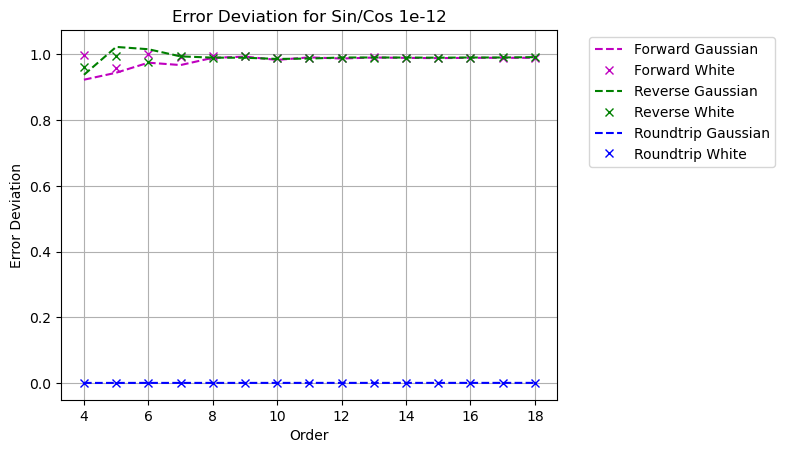

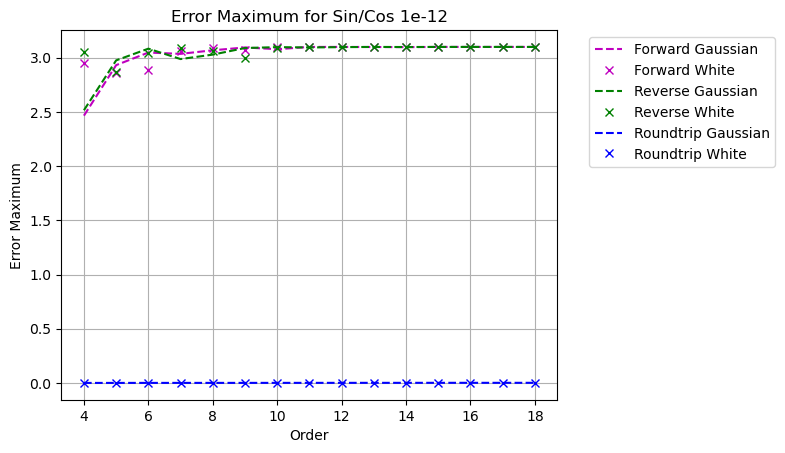

In [343]:
PlotOrderAll(1e-12, 'Aggr')

## Slope

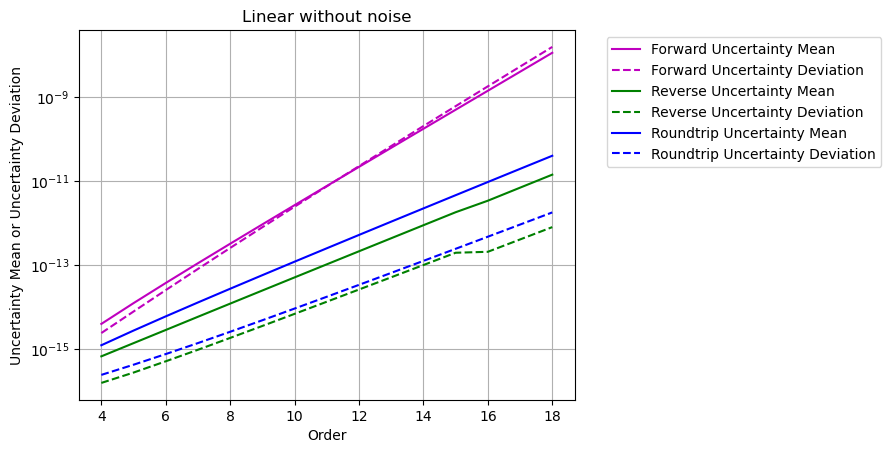

In [348]:
PlotUncertainty('Linear')

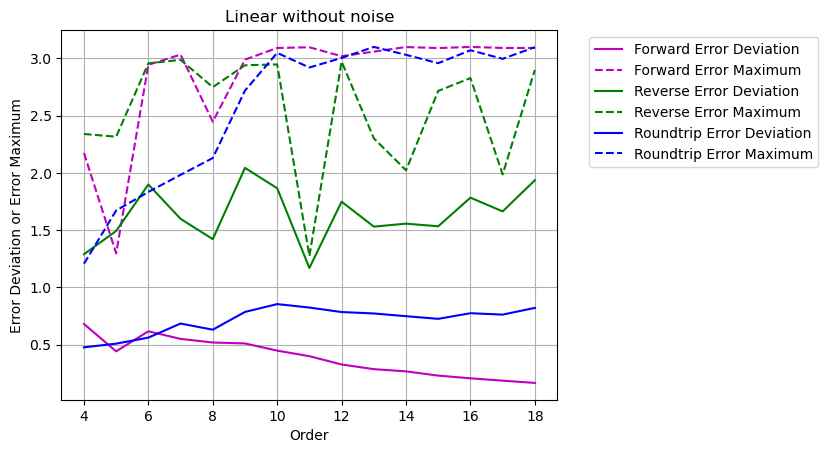

In [352]:
PlotError('Linear')

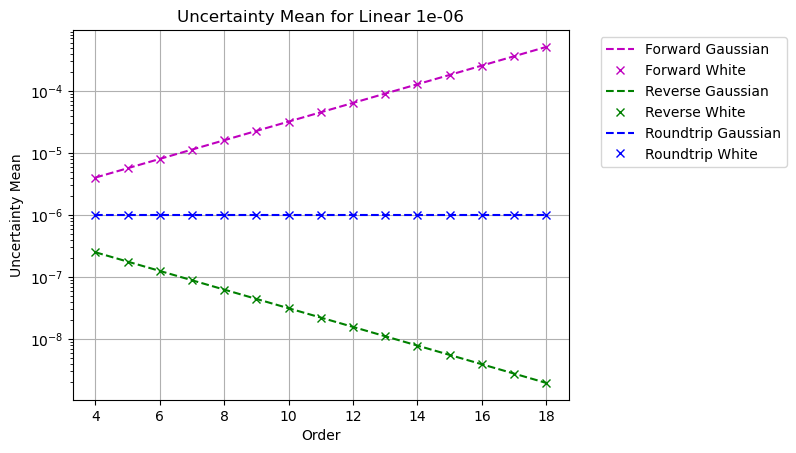

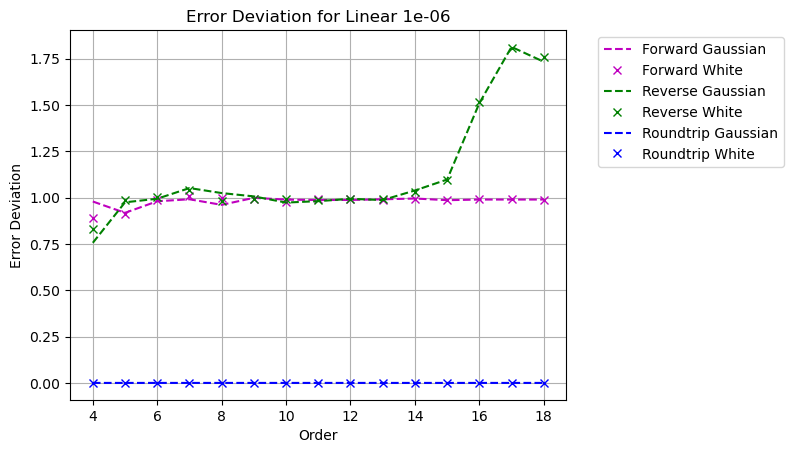

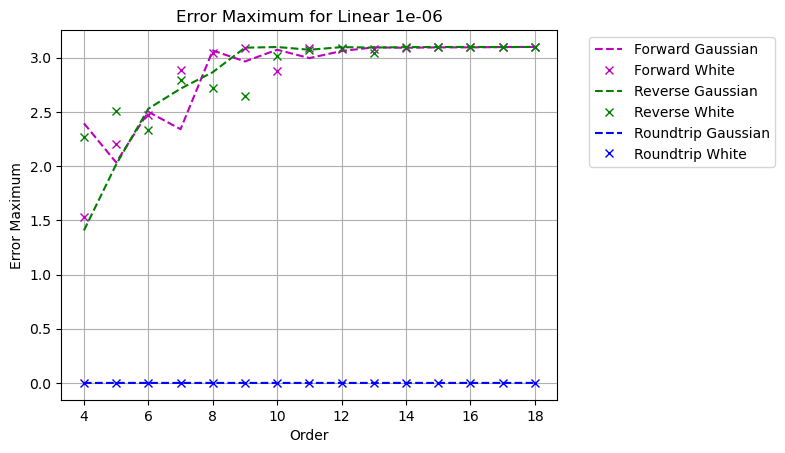

In [354]:
PlotOrderAll(1e-6, 'Linear')

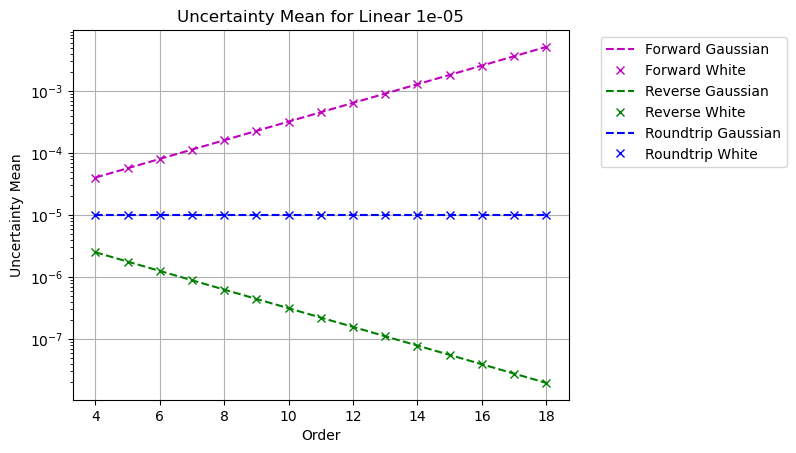

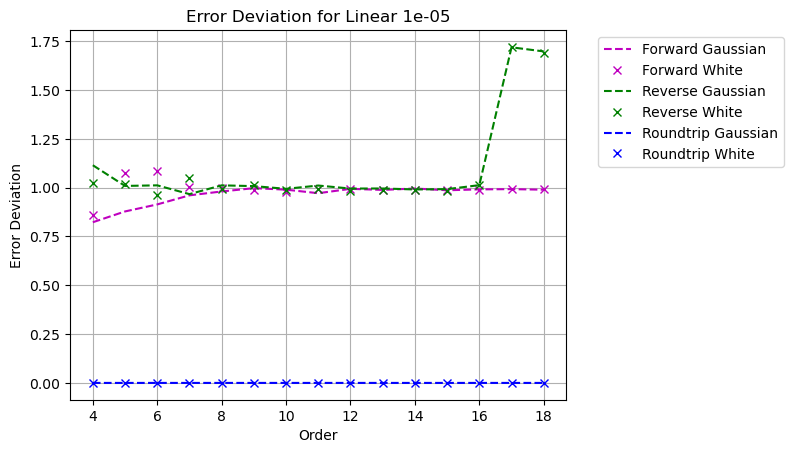

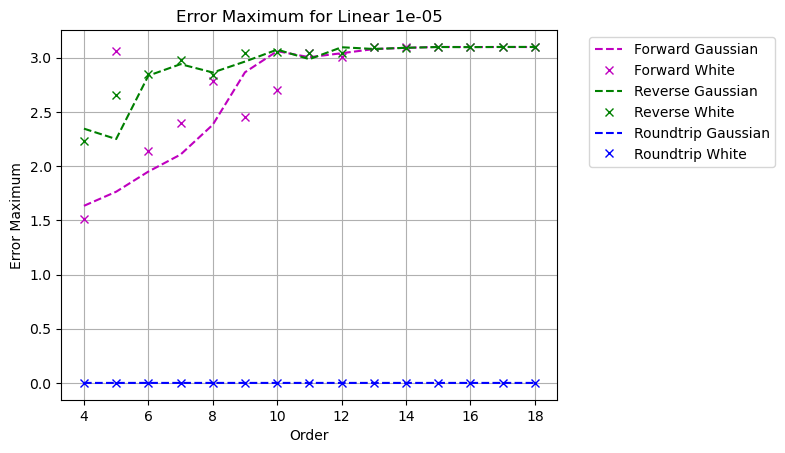

In [355]:
PlotOrderAll(1e-5, 'Linear')

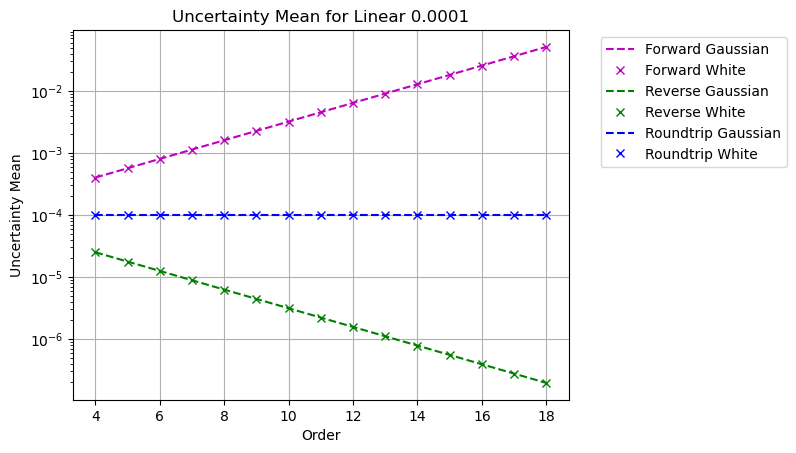

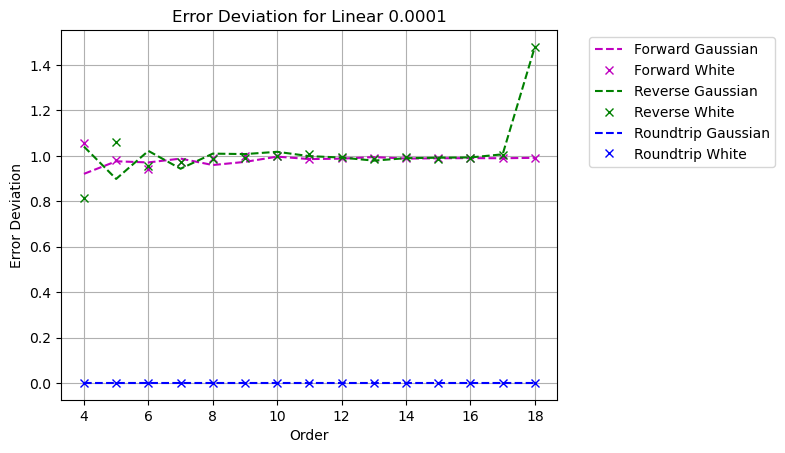

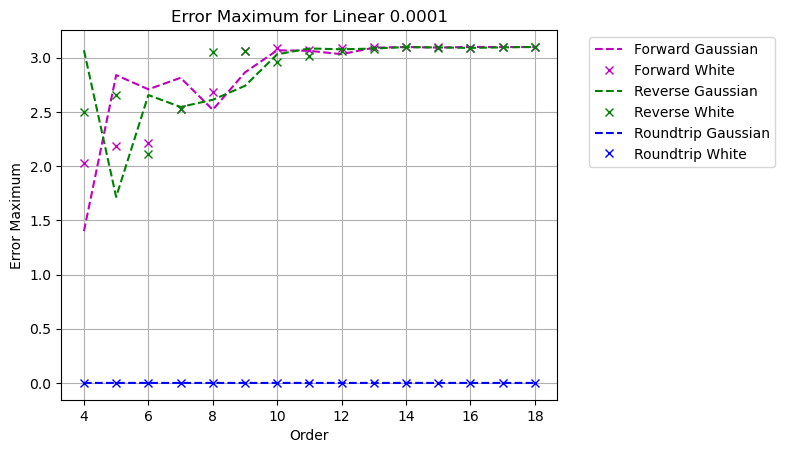

In [356]:
PlotOrderAll(1e-4, 'Linear')

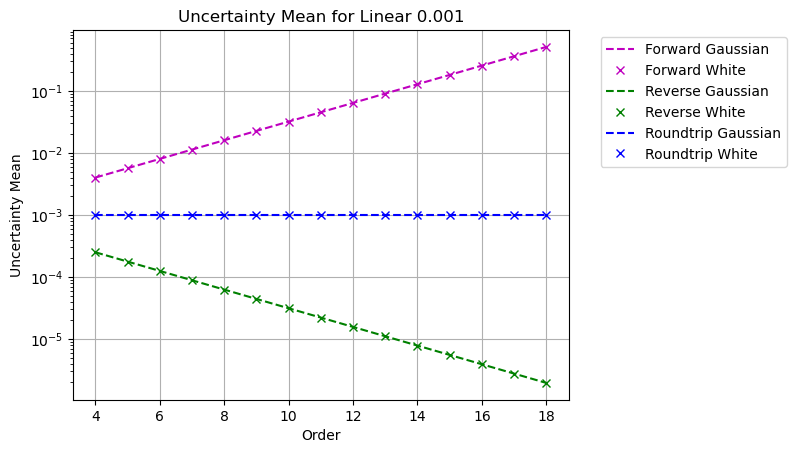

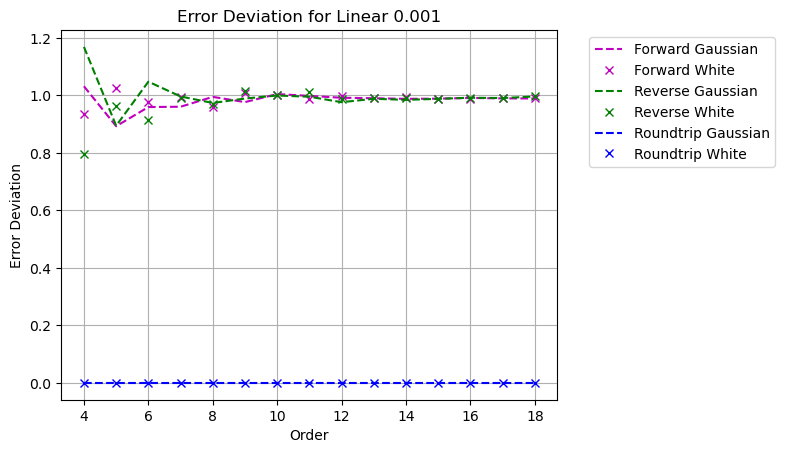

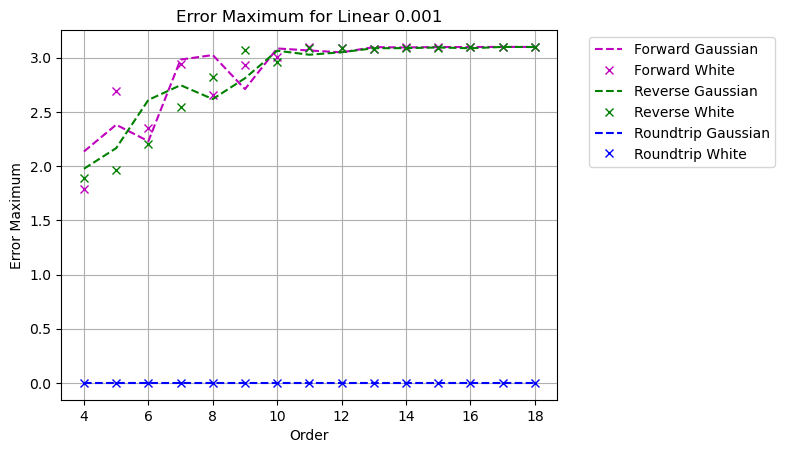

In [357]:
PlotOrderAll(1e-3, 'Linear')

# vs Noise

In [389]:
def PlotNoise( value, order, signal, freq=0, 
               sStyle=['--', 'x', '-', '+'], sColor = ['m','g','b','y','c','r'] ):
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    
    fig, ax = plt.subplots()
    ax.set_title(f'{value} for {signalName} order={order}')
    ax.set_xlabel('Noise')
    ax.set_xscale('log')
    ax.set_ylabel(value)
    if value == 'Uncertainty Mean':
        ax.set_yscale('log')
    plt.grid(True)
    for test, color in zip(['Forward', 'Reverse', 'Roundtrip'], sColor):
        for noiseType, style in zip(['Gaussian', 'White'], sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']!=0) & (df['Order']==order) & 
                        (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['Noise'], dfPlot[value], ''.join([color, style]), label=f'{test} {noiseType}')
    ax.legend(bbox_to_anchor=(1.05, 1.0))
    
def PlotNoiseAll(signal, freq=0):
    for value in ['Uncertainty Mean', 'Error Deviation', 'Error Maximum']:
        PlotNoise( value, 18, signal, freq )

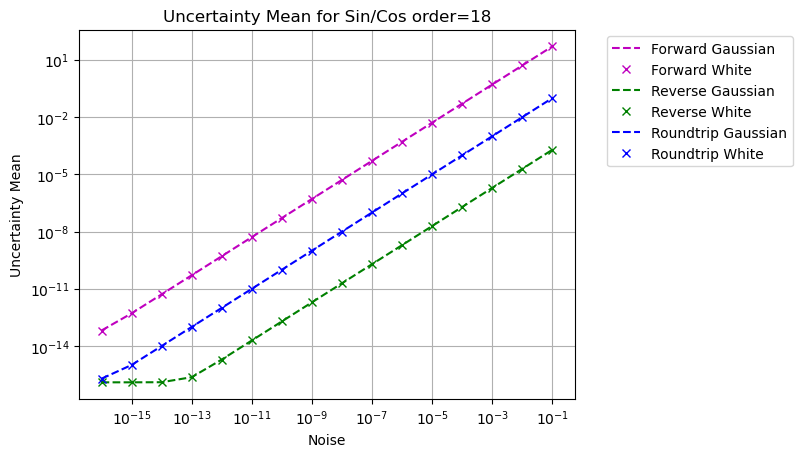

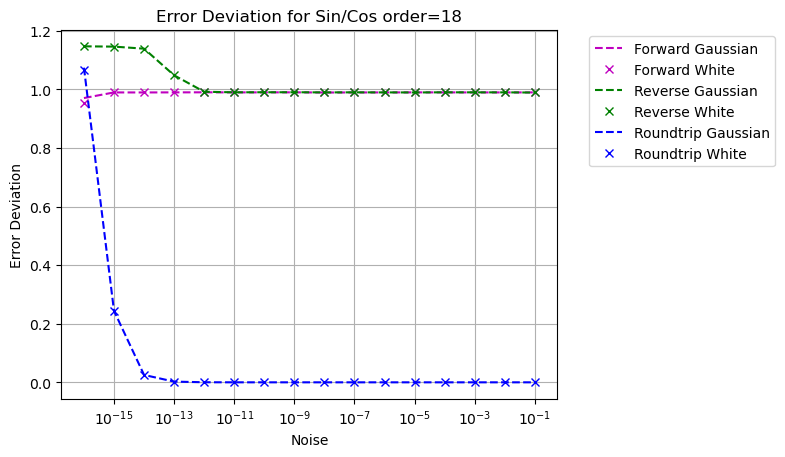

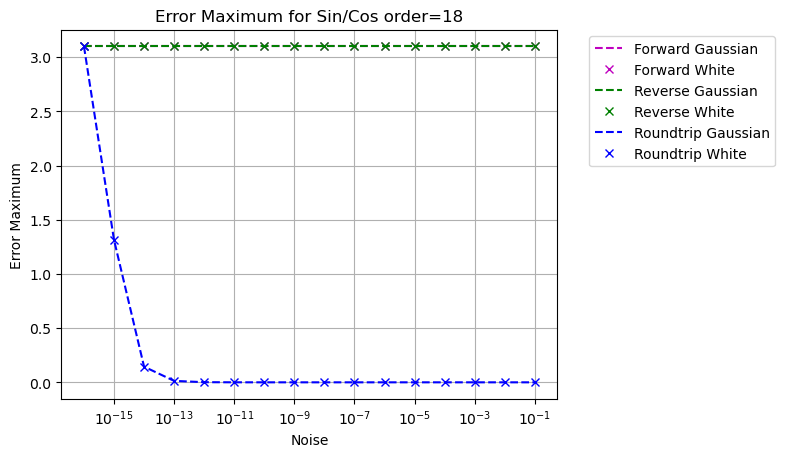

In [390]:
PlotNoiseAll('Aggr')

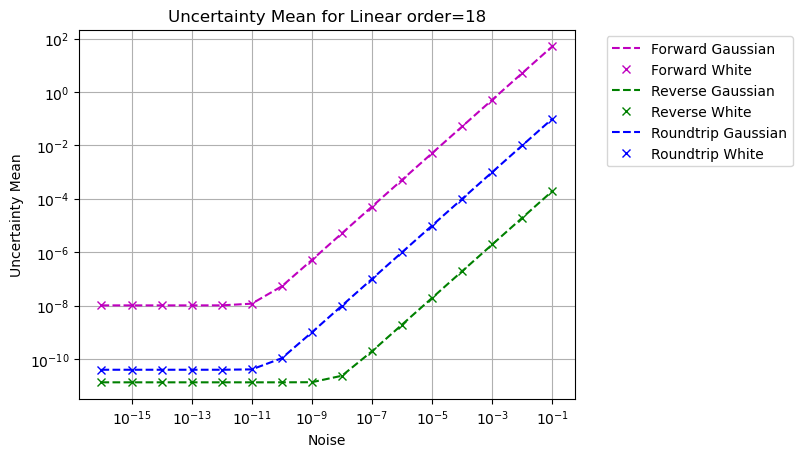

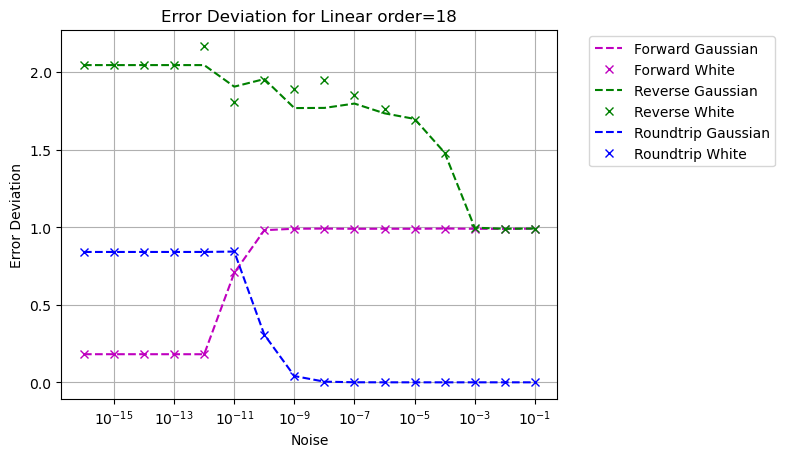

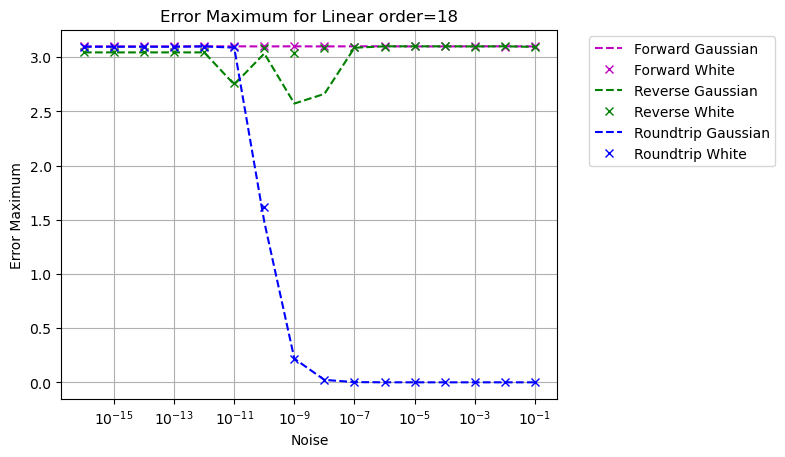

In [392]:
PlotNoiseAll('Linear')